In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [35]:
ticker = 'MSFT'
data = yf.Ticker(ticker)
data = data.history('5y')
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-09-09 00:00:00-04:00,133.329340,133.482168,130.339732,131.352188,25773900,0.0,0.0
2019-09-10 00:00:00-04:00,130.664470,130.750430,128.477169,129.976761,28903400,0.0,0.0
2019-09-11 00:00:00-04:00,129.814426,130.158281,129.031196,130.014999,24726100,0.0,0.0
2019-09-12 00:00:00-04:00,131.667389,132.211817,130.731332,131.352188,27010000,0.0,0.0
2019-09-13 00:00:00-04:00,131.600555,131.867995,130.444831,131.161194,23363100,0.0,0.0


In [36]:
data = data.reset_index()
data = data.drop(['Date','Volume','Dividends','Stock Splits'], axis=1)
data.head()

,Open,High,Low,Close
0,133.329340,133.482168,130.339732,131.352188
1,130.664470,130.750430,128.477169,129.976761
2,129.814426,130.158281,129.031196,130.014999
3,131.667389,132.211817,130.731332,131.352188
4,131.600555,131.867995,130.444831,131.161194


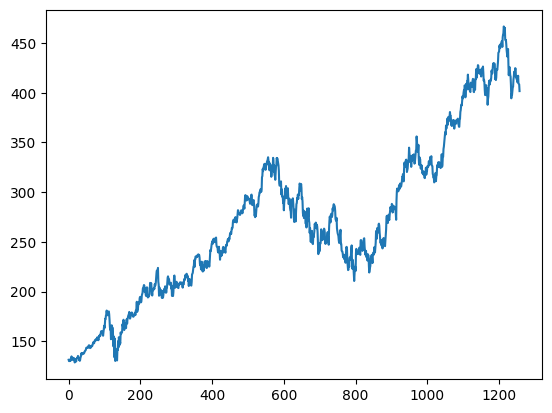

In [37]:
plt.plot(data.Close)

In [38]:
ma100 = data.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
1253    424.326866
1254    424.203888
1255    424.028978
1256    423.909052
1257    423.804528
Name: Close, Length: 1258, dtype: float64

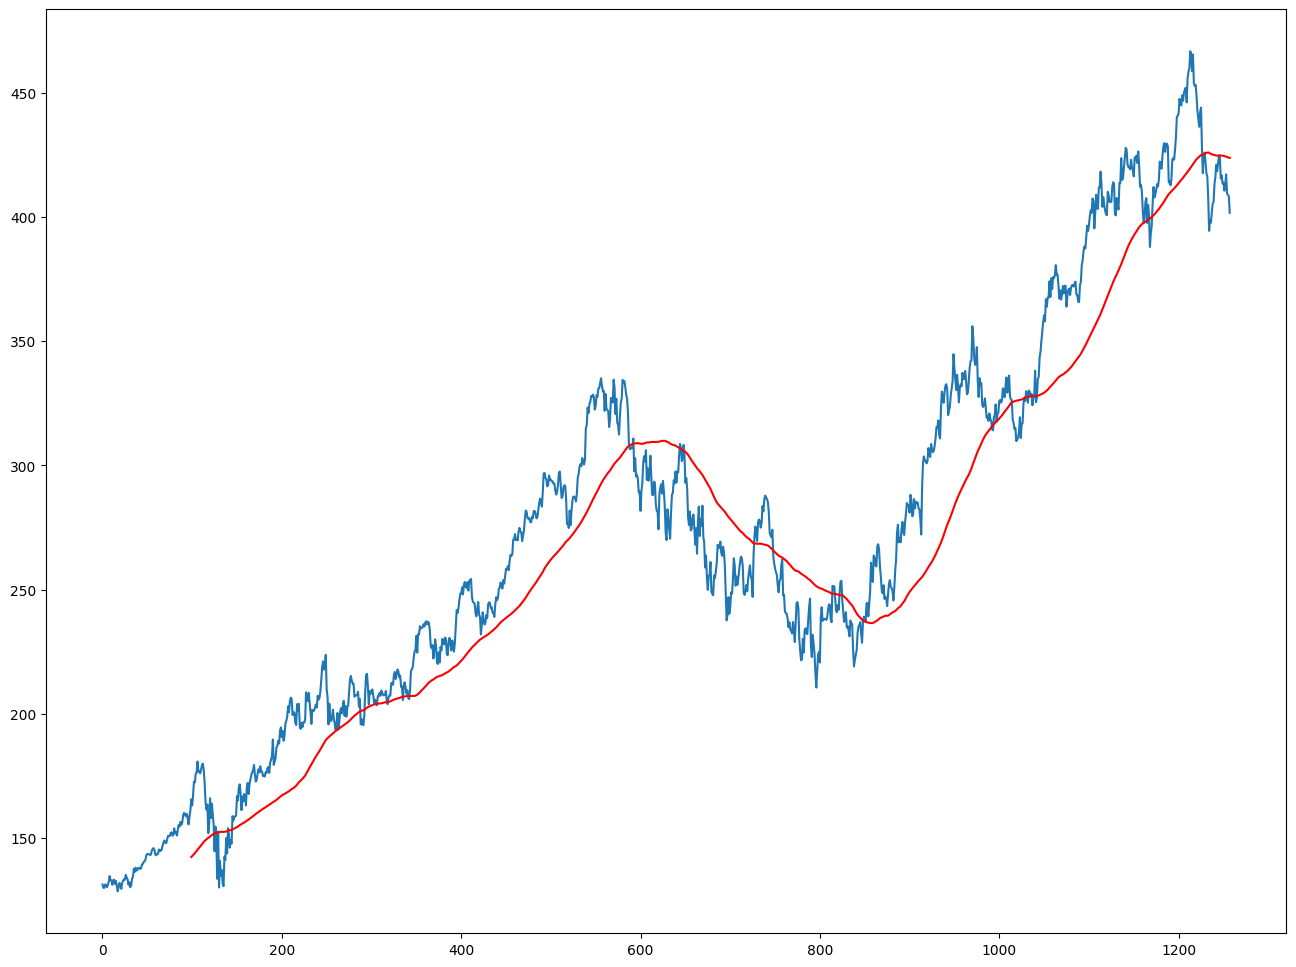

In [39]:
plt.figure(figsize=(16,12))
plt.plot(data.Close)
plt.plot(ma100,'r')


In [40]:
ma200 = data.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
1253    409.314248
1254    409.523891
1255    409.730087
1256    409.901411
1257    410.070713
Name: Close, Length: 1258, dtype: float64

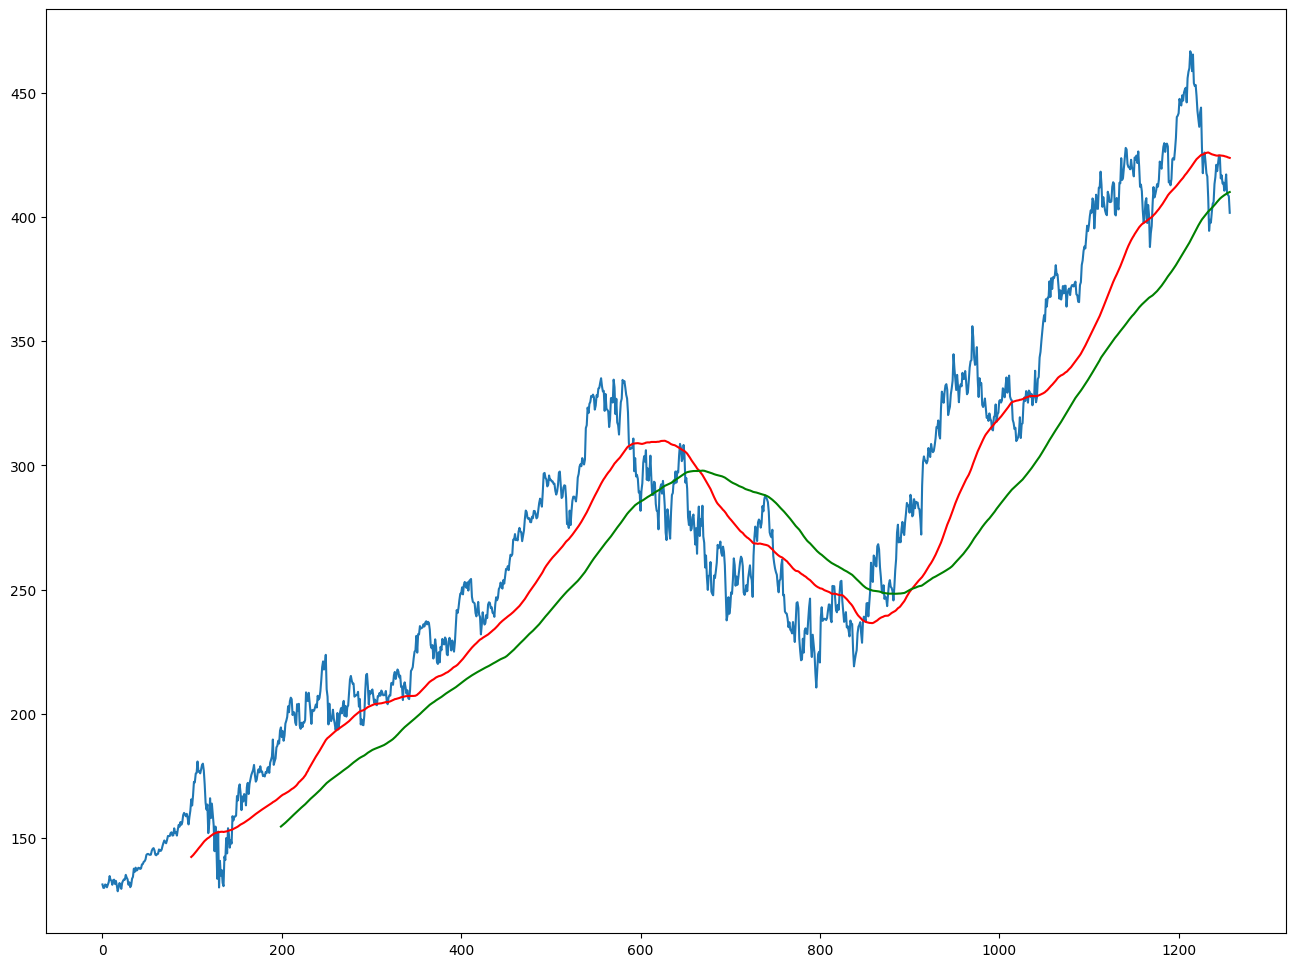

In [41]:
plt.figure(figsize=(16,12))
plt.plot(data.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [42]:
data.shape

(1258, 4)

In [43]:
# Splitting Data for training and testing

data_training = pd.DataFrame(data['Close'][0:int(len(data)*0.8)])
data_testing = pd.DataFrame(data['Close'][int(len(data)*0.8):len(data)])
print(data_training)
print(data_testing)

           Close
0     131.352188
1     129.976761
2     130.014999
3     131.352188
4     131.161194
...          ...
1001  326.340485
1002  325.318176
1003  326.211426
1004  331.065002
1005  330.400024

[1006 rows x 1 columns]
           Close
1006  327.452118
1007  331.779602
1008  335.422302
1009  329.298248
1010  333.556305
...          ...
1253  417.140015
1254  409.440002
1255  408.899994
1256  408.390015
1257  401.700012

[252 rows x 1 columns]


In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [45]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01205222],
       [0.00600498],
       [0.0061731 ],
       ...,
       [0.86877602],
       [0.8901154 ],
       [0.88719174]])

In [46]:
x_train = []
y_train = []
for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train

[array([[0.01205222],
        [0.00600498],
        [0.0061731 ],
        [0.01205222],
        [0.01121249],
        [0.00705503],
        [0.01150647],
        [0.01625182],
        [0.02696048],
        [0.02011517],
        [0.01885527],
        [0.0114644 ],
        [0.01977926],
        [0.02053534],
        [0.01293422],
        [0.01839337],
        [0.01016264],
        [0.        ],
        [0.00684518],
        [0.01457195],
        [0.01037256],
        [0.00428332],
        [0.01507605],
        [0.01868742],
        [0.02112295],
        [0.0205772 ],
        [0.02906004],
        [0.02418877],
        [0.02116508],
        [0.01159053],
        [0.01587385],
        [0.00722295],
        [0.01087665],
        [0.02221507],
        [0.02553266],
        [0.04006269],
        [0.03435128],
        [0.04182648],
        [0.0366191 ],
        [0.03808864],
        [0.04157443],
        [0.04119653],
        [0.03951653],
        [0.04035653],
        [0.04749568],
        [0

In [47]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [48]:
# Building Model
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [49]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.1))
model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=100, activation='relu', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1))

e:\Projects\New Projects\Stock Prediction App\env\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [50]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_7 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 100, 100)       │        72,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 100, 100)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 100, 80)        │        57,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_12 (LSTM)                  │ (None, 100, 60)        │        33,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 50)             │        22,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 268,571 (1.02 MB)

 Trainable params: 268,571 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [51]:
model.compile(optimizer='adam', loss='mean_absolute_error')
model.fit(x_train, y_train, epochs=80)

Epoch 1/80
29/29 ━━━━━━━━━━━━━━━━━━━━ 13s 194ms/step - loss: 0.3884
Epoch 2/80
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 197ms/step - loss: 0.1450
Epoch 3/80
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 217ms/step - loss: 0.1002
Epoch 4/80
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 207ms/step - loss: 0.0762
Epoch 5/80
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 235ms/step - loss: 0.0755
Epoch 6/80
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 240ms/step - loss: 0.0728
Epoch 7/80
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 230ms/step - loss: 0.0701
Epoch 8/80
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 241ms/step - loss: 0.0733
Epoch 9/80
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 223ms/step - loss: 0.0690
Epoch 10/80
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 225ms/step - loss: 0.0721
Epoch 11/80
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 226ms/step - loss: 0.0632
Epoch 12/80
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 250ms/step - loss: 0.0682
Epoch 13/80
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 245ms/step - loss: 0.0726
Epoch 14/80
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 234ms/step - loss: 0.0682
Epoch 15/80
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 246ms/step - l

In [52]:
model.save('lstm_model.h5')

In [53]:
data_testing.head()

,Close
1006,327.452118
1007,331.779602
1008,335.422302
1009,329.298248
1010,333.556305


In [54]:
past_100_days = data_training.tail(100)
past_100_days

,Close
906,282.790009
907,285.418793
908,284.993896
909,285.072968
910,282.760345
...,...
1001,326.340485
1002,325.318176
1003,326.211426
1004,331.065002


In [55]:
final_df = pd.concat([past_100_days,data_testing])
final_df

,Close
906,282.790009
907,285.418793
908,284.993896
909,285.072968
910,282.760345
...,...
1253,417.140015
1254,409.440002
1255,408.899994
1256,408.390015


In [56]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.05446383],
       [0.06797782],
       [0.06579352],
       [0.06620001],
       [0.05431134],
       [0.05253306],
       [0.03226146],
       [0.        ],
       [0.10135755],
       [0.14941989],
       [0.16176587],
       [0.15312863],
       [0.15236664],
       [0.14723528],
       [0.15236664],
       [0.17898875],
       [0.16882769],
       [0.1604446 ],
       [0.18742268],
       [0.17624532],
       [0.17045364],
       [0.17294291],
       [0.1845266 ],
       [0.19949631],
       [0.22251087],
       [0.22159404],
       [0.23605466],
       [0.20591192],
       [0.19873244],
       [0.26018953],
       [0.29567857],
       [0.28712447],
       [0.27276582],
       [0.2941    ],
       [0.30845865],
       [0.3112082 ],
       [0.29970076],
       [0.24725633],
       [0.25682892],
       [0.26461915],
       [0.29038311],
       [0.30280691],
       [0.31833653],
       [0.37312308],
       [0.34374389],
       [0.32195145],
       [0.29908985],
       [0.330

In [57]:
input_data.shape

(352, 1)

In [58]:
x_test = []
y_test = []
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [59]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(252, 100, 1)
(252,)


In [60]:
# Making Predictions
y_predicted = model.predict(x_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 160ms/step


In [61]:
y_predicted.shape

(252, 1)

In [62]:
y_test

array([0.28406163, 0.30630824, 0.32503454, 0.29355216, 0.31544187,
       0.32891224, 0.28564333, 0.27972441, 0.27763236, 0.23742504,
       0.23109807, 0.21823986, 0.22094423, 0.19339086, 0.19670723,
       0.2010446 , 0.21181076, 0.24268066, 0.19976882, 0.22818944,
       0.2302305 , 0.27054027, 0.28360243, 0.27630607, 0.296869  ,
       0.2904399 , 0.2729384 , 0.29799151, 0.29503189, 0.28508216,
       0.29125617, 0.26752982, 0.28105134, 0.28722535, 0.33896442,
       0.27375482, 0.28355144, 0.32181999, 0.32590195, 0.36651764,
       0.37799825, 0.40085718, 0.4198894 , 0.44029954, 0.45392302,
       0.4411158 , 0.48693612, 0.47167962, 0.48999739, 0.49076456,
       0.52399807, 0.49168484, 0.53049118, 0.50814808, 0.53258747,
       0.53043988, 0.53647301, 0.55738486, 0.53770016, 0.53800702,
       0.51551049, 0.4880547 , 0.50533594, 0.48631627, 0.49730881,
       0.51407908, 0.49909823, 0.51484593, 0.51479463, 0.47164228,
       0.49618411, 0.5060005 , 0.50911966, 0.49562153, 0.51055

In [63]:
y_predicted

array([[0.323202  ],
       [0.3236829 ],
       [0.32441068],
       [0.3253534 ],
       [0.3264693 ],
       [0.32771423],
       [0.32905552],
       [0.33044   ],
       [0.3317779 ],
       [0.33295944],
       [0.333856  ],
       [0.33434317],
       [0.33432576],
       [0.3337793 ],
       [0.33273208],
       [0.33124006],
       [0.32939538],
       [0.32729745],
       [0.32507133],
       [0.32283336],
       [0.3206792 ],
       [0.31868678],
       [0.31693855],
       [0.315535  ],
       [0.31456327],
       [0.3140886 ],
       [0.31414026],
       [0.31469148],
       [0.31569296],
       [0.31706375],
       [0.31868458],
       [0.32042414],
       [0.32214636],
       [0.32373178],
       [0.32510227],
       [0.3262697 ],
       [0.3272802 ],
       [0.3281715 ],
       [0.32898825],
       [0.32979375],
       [0.33069745],
       [0.33187944],
       [0.33364987],
       [0.3366085 ],
       [0.34180677],
       [0.35044575],
       [0.36322045],
       [0.380

In [64]:
scaler.scale_

array([0.00514077])

In [65]:
scale_factor = 1/0.00514077
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

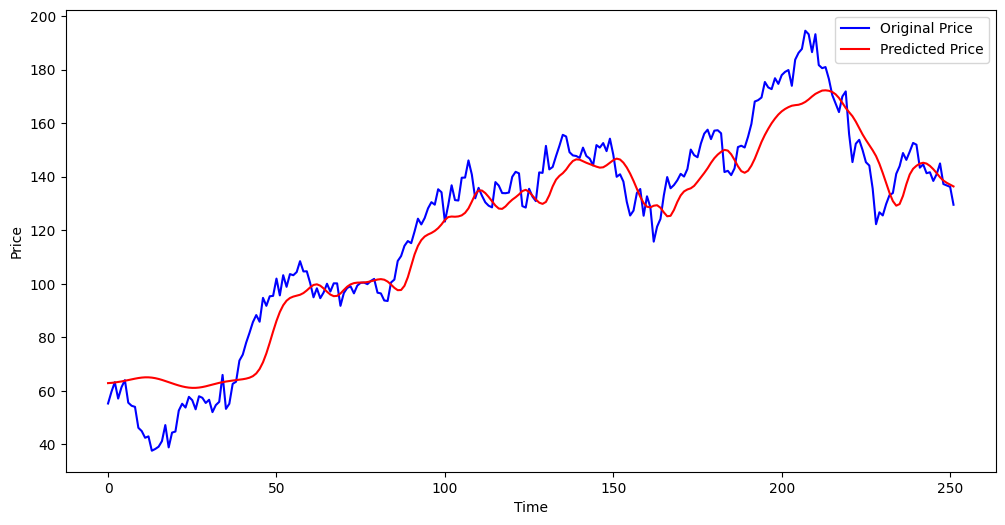

In [66]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()